# 1.Prepartion

1.1 Import pakages

In [1]:
# pakages
import sys
import json
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import graphviz
import pydotplus
from os import path
from sklearn import tree
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from scipy import spatial
from IPython.display import Image

plt.style.use("ggplot")
# let picture inline
%matplotlib inline

1.2 Set some useful constant variables

In [2]:
# Project workspace
WORKSPACE="D:\\Desktop\\563\\Assignment\\Project"

1.3 Load data

In [3]:
movies_file_path = path.join(WORKSPACE, "data", "tmdb_5000_movies.csv")
credits_file_path=path.join(WORKSPACE, "data", "tmdb_5000_credits.csv")
movies=None
Credits=None 
try:
    movies=pd.read_csv(movies_file_path)
    credits=pd.read_csv(credits_file_path)
    print("Read movies and credits successfully")
except e:
    print("Error: ",e)
finally:
    pass

Read movies and credits successfully


1.4 Preview data

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [5]:
movies.head(1)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                      homepage     id  \
0  http://www.avatarmovie.com/  19995   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   

  original_title                                           overview  \
0         Avatar  In the 22nd century, a paraplegic Marine is di...   

   popularity                               production_companies  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   

                       tagline   title  vote_average  vote_count  
0  Enter the World of Pandora.  Avatar           7.2       11800

In [6]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [7]:
credits.head(1)

movie_id   title                                               cast  \
0     19995  Avatar  [{"cast_id": 242, "character": "Jake Sully", "...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...

1.5 Data pre-Process

1. data duplication
2. data missing
3. data recording error

In [8]:
# data duplication
if len(movies.id.unique())==len(movies):
    print("No duplication\n")
else:
    print("Duplication exists\n")

# data missing
print(movies.isnull().any())
print("There are only homepage, overview, release_data, run_time columns which is not important missing data.")
print("We do not need these information, so that just ignore them\n")

# data recording error
print("Didn't find data recording error")

No duplication

budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title                   False
vote_average            False
vote_count              False
dtype: bool
There are only homepage, overview, release_data, run_time columns which is not important missing data.
We do not need these information, so that just ignore them

Didn't find data recording error


In [9]:
# merge two data sets
movies_credits=movies.merge(credits,left_on="id",right_on="movie_id",how="left")
movies_credits.info()
movies_credits.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title_x                 4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                      homepage     id  \
0  http://www.avatarmovie.com/  19995   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   

  original_title                                           overview  \
0         Avatar  In the 22nd century, a paraplegic Marine is di...   

   popularity                               production_companies  ...  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   

                       tagline  title_x vote_average vote_count movie_id  \
0  Enter the World of Pandora.   Avatar          7.2      11800    19995   

  title_y                                               cast  \
0  Avatar  [{"cast_id": 242, "character": "Jake Sully", "...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  

[1 rows x 24 columns]

In [10]:
# extract useful data from json format columns: genres, keywords, casts...
columns=['genres', 'keywords', 'production_companies', 'production_countries', 'cast', 'crew']
for col in columns:
    movies_credits[col] = movies_credits[col].apply(json.loads)

useful_colums=['genres', 'production_companies', 'production_countries']
func=lambda x:[[item['name'] for item in row] for row in x]
for col in useful_colums:
    movies_credits[col]=func(movies_credits[col])

# 4 stars 
movies_credits['stars']=[[item['name']for item in row[:4]]for row in movies_credits['cast']]
# 10 keywords
movies_credits['keywords']=[[item['name']for item in row[:10]]for row in movies_credits['keywords']]

In [11]:
# process director, weiter, crew
def extract_crew_job(crew,job):
    name=""
    for item in crew:
        if item['job']==job:
            name=item['name']
            break
    return name
    
movies_credits['director'] = [extract_crew_job(crew, 'Director') for crew in movies_credits.crew]
movies_credits['writer'] = [extract_crew_job(crew, 'Writer') for crew in movies_credits.crew]
movies_credits['producer'] = [extract_crew_job(crew, 'Producer') for crew in movies_credits.crew]

In [12]:
# process release date
func=lambda x:x.year
movies_credits['year'] = pd.to_datetime(movies_credits['release_date']).apply(func)

1.5 Select data

In [13]:
movies = movies_credits[['title_x', 'genres', 'keywords', 'director', 'stars', 'writer', 'producer', 'budget', 'revenue','popularity', 'vote_average', 'vote_count', 'production_companies', 'production_countries', 'year']]
#movies.info()
movies=movies.dropna()
movies.rename(columns={'title_x': 'title'}, inplace=True)
movies.year = movies.year.astype(int)
movies.describe()

budget       revenue   popularity  vote_average    vote_count  \
count  4.802000e+03  4.802000e+03  4802.000000   4802.000000   4802.000000   
mean   2.905109e+07  8.227777e+07    21.496776      6.093440    690.361724   
std    4.072447e+07  1.628697e+08    31.818451      1.191496   1234.674268   
min    0.000000e+00  0.000000e+00     0.000372      0.000000      0.000000   
25%    8.000000e+05  0.000000e+00     4.671734      5.600000     54.000000   
50%    1.500000e+07  1.917498e+07    12.924931      6.200000    235.500000   
75%    4.000000e+07  9.291920e+07    28.332017      6.800000    737.000000   
max    3.800000e+08  2.787965e+09   875.581305     10.000000  13752.000000   

              year  
count  4802.000000  
mean   2002.468763  
std      12.414354  
min    1916.000000  
25%    1999.000000  
50%    2005.000000  
75%    2011.000000  
max    2017.000000

1. From aspect of statistics, info with low vote count is meaningless because these ratings
are influenced by outliers greatly.
2. We should notice that we should not use data spans long yeas because that will induce many other
factors such as inflation.

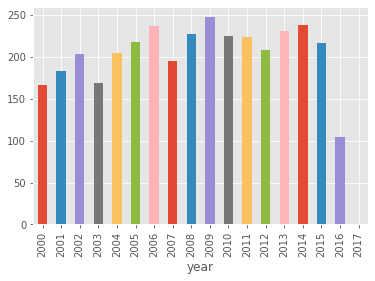

In [14]:
color=[x['color'] for x in list(plt.rcParams['axes.prop_cycle'])]
movies[movies.year>=2000].groupby('year').size().plot(kind='bar',color=color)

From picture above, the average movie number is around 200 and number of 2016 is less than average a lot. Therefore, we could infer the data of 2016 is not complete and we only use data from 2000 to 2015.

In [15]:
movies0015=movies[(movies.year >= 2000) & (movies.year < 2016) & (movies.vote_count > 40) &(movies.budget * movies.revenue * movies.popularity * movies.vote_average !=0)]
movies0015=movies0015.reset_index(drop = 'True')

## 2. Revenue analysis

2.1 Revenue Top 10

In [16]:
movies0015.sort_values('revenue',ascending=False)[['title','revenue','budget','genres']][:10]

title     revenue     budget  \
0                                           Avatar  2787965087  237000000   
15                                    The Avengers  1519557910  220000000   
25                                  Jurassic World  1513528810  150000000   
41                                       Furious 7  1506249360  190000000   
7                          Avengers: Age of Ultron  1405403694  280000000   
109                                         Frozen  1274219009  150000000   
28                                      Iron Man 3  1215439994  200000000   
440                                        Minions  1156730962   74000000   
49                  Transformers: Dark of the Moon  1123746996  195000000   
281  The Lord of the Rings: The Return of the King  1118888979   94000000   

                                             genres  
0     [Action, Adventure, Fantasy, Science Fiction]  
15             [Science Fiction, Action, Adventure]  
25   [Action, Adventure, Science Fiction, Thriller]  
41                                         [Action]  
7              [Action, Adventure, Science Fiction]  
109                  [Animation, Adventure, Family]  
28             [Action, Adventure, Science Fiction]  
440          [Family, Animation, Adventure, Comedy]  
49             [Action, Science Fiction, Adventure]  
281                    [Adventure, Fantasy, Action]

1. The budget of these 10 movies is hundred million level and revenue is billion level, which means high investment and high return.
2. There are 8 movies belong to Action and Science Fiction. So the genres of movie may have great relation to the revenue.

2.2 Revenue, budget and rating of return(ROI) variation trend

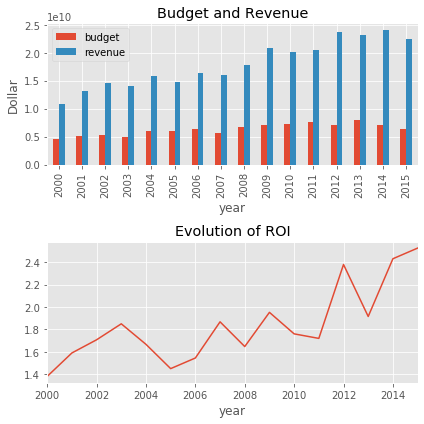

In [17]:
bgt_rvn=movies0015.groupby('year')['budget','revenue'].sum()
bgt_rvn['ROI']=(bgt_rvn.revenue-bgt_rvn.budget)/bgt_rvn.budget

fig,axes=plt.subplots(2,1,figsize=(6,6))
bgt_rvn.iloc[:,:2].plot(kind='bar',ax=axes[0],title='Budget and Revenue')
axes[0].set_ylabel('Dollar')
bgt_rvn.ROI.plot(ax=axes[1],title='Evolution of ROI')
fig.tight_layout()

From 2000 to 2015, budget of movies has not chanage a lot, but the revenue has increase on an even keel.

2.3 The factors of revenue and rating

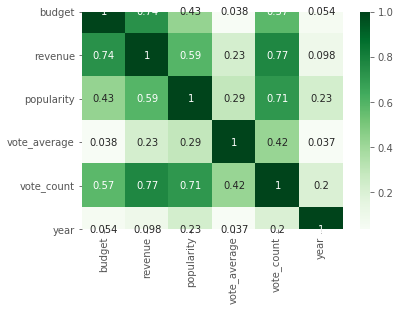

In [18]:
sns.heatmap(movies0015.corr(),annot=True,vmax=1,square=True,cmap="Greens")

2.4 Trend of movies genres

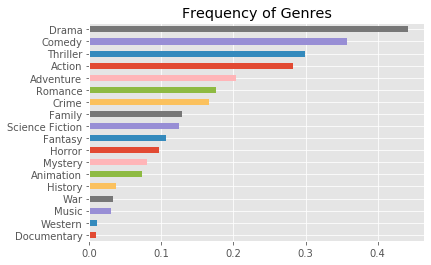

In [19]:
def countF(column):
    count=dict()
    for row in column:
        for ele in row:
            if ele in count:
                count[ele]+=1
            else:
                count[ele]=1
    return count

genres=pd.Series(countF(movies0015.genres)).sort_values()
genres_avg=genres/len(movies0015)
#print(genres_avg)
color=[x['color'] for x in list(plt.rcParams['axes.prop_cycle'])]
genres_avg.plot(kind='barh',title='Frequency of Genres',color=color)

1. There are 18 kinds of genres and the top 3 genres is Drama, Comedy and Thriller.

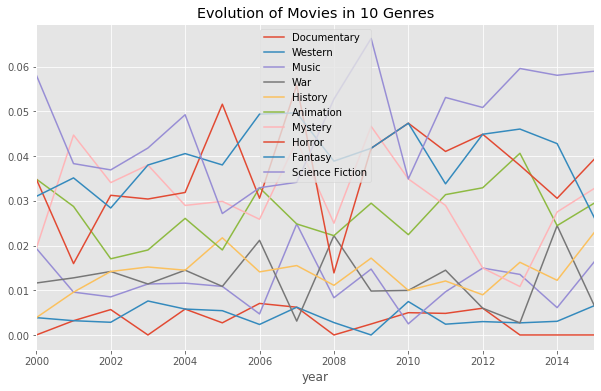

In [20]:
# select top 10 genres and observe the trend in the 15 years.
genres_by_year = movies0015.groupby('year').genres.sum()
genres_count = pd.DataFrame([], index = genres_by_year.index, columns = genres.index[:10])
for g in genres_count.columns:
    for y in genres_count.index:
        genres_count.loc[y,g] = genres_by_year[y].count(g) / len(genres_by_year[y])
genres_count.plot(figsize = (10,6), title = 'Evolution of Movies in 10 Genres')

1. Every kind of movies' number keeps stability generally.
2. The fraction of Comedy decreased and and Science Fiction increased.   

2.5 Revenue of different genres

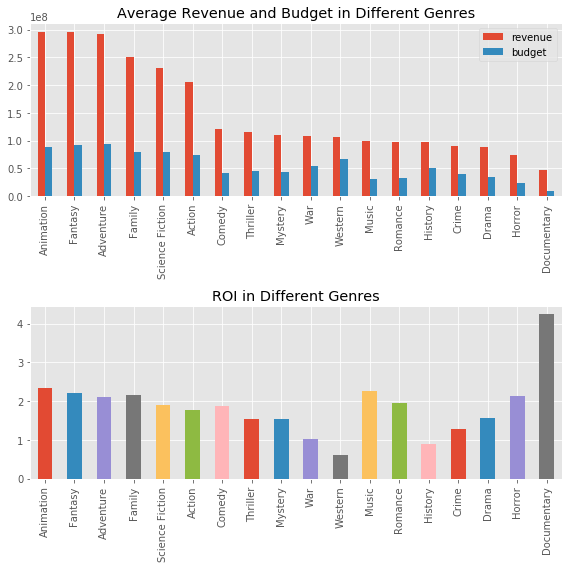

In [21]:
movies_by_genres = pd.DataFrame(0, index = genres.index, columns = ['revenue', 'budget', 'vote'])
for i in range(len(movies0015)):
    for g in movies0015.genres[i]:
        movies_by_genres.loc[g, 'revenue'] += movies0015.revenue[i]    
        movies_by_genres.loc[g, 'budget'] += movies0015.budget[i]    
        movies_by_genres.loc[g, 'vote'] += movies0015.vote_average[i]     
movies_by_genres = movies_by_genres.div(genres.values, axis=0)
movies_by_genres['ROI'] = (movies_by_genres.revenue - movies_by_genres.budget) / movies_by_genres.budget

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
movies_by_genres.sort_values('revenue', ascending=False)[['revenue', 'budget']].plot(ax=axes[0], kind = 'bar', title='Average Revenue and Budget in Different Genres')

color=[x['color'] for x in list(plt.rcParams['axes.prop_cycle'])]
movies_by_genres.sort_values('revenue', ascending=False)['ROI'].plot(ax=axes[1], kind = 'bar', title='ROI in Different Genres',color=color)
fig.tight_layout()

1. Top 5 high revenue genres is Animation, Fantasy, Adventure, Science Fiction and Action.
2. Movies of documentary has the highest return rate.

2.6 The relation between revenue and director

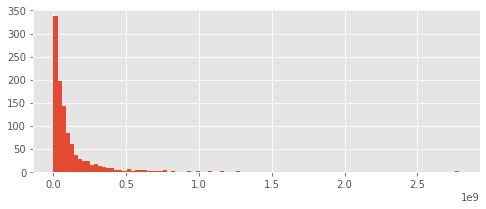

In [22]:
director_avg_rvn=movies0015.groupby('director').revenue.mean()

director_avg_rvn.hist(bins=100,figsize=(8,3))

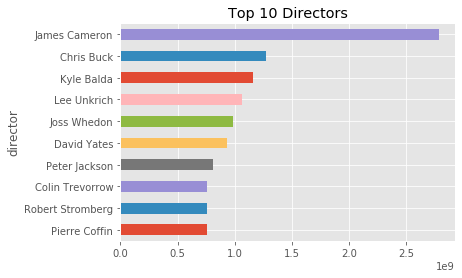

In [23]:
# Top 10 directors
color=[x['color'] for x in list(plt.rcParams['axes.prop_cycle'])]
director_avg_rvn.sort_values().tail(10).plot(kind='barh',title='Top 10 Directors',color=color)

1. We can see that James Cameron is the best director who is ahead of anyone else.
2. But we need to exclude factor of movie genres.

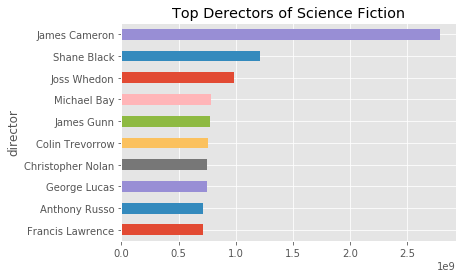

In [24]:
director_rvn_grs=movies0015[movies0015.genres.str.contains('Science Fiction',regex=False)].groupby('director').revenue.mean()
color=[x['color'] for x in list(plt.rcParams['axes.prop_cycle'])]
director_rvn_grs.sort_values().tail(10).plot(kind='barh',title='Top Derectors of Science Fiction',color=color)

2.7 The relation between revenue and star actors

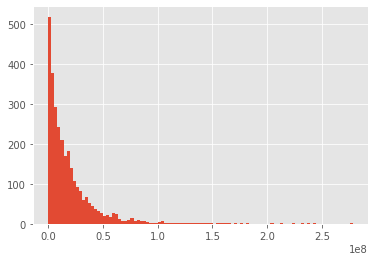

In [25]:
# we dont consider the voice actor now
movies_nova=movies0015[~movies0015.genres.str.contains('Animation',regex=False)]
movies_nova=movies_nova.reset_index(drop='True')

stars=pd.Series(countF(movies_nova.stars)).sort_values()
# print(stars)
movies_by_stars=pd.DataFrame(0,index=stars.index,columns=['revenue','vote'])
#
w4=[0.4,0.3,0.2,0.1]
w3=[0.4,0.35,0.25]
w2=[0.6,0.4]
w1=[1.0]
weight=[w1,w2,w3,w4]
for i in range(len(movies_nova)):
    actorlist=movies_nova.stars[i][:4]
    # print(actorlist)
    for j in range(len(actorlist)):
        movies_by_stars.loc[actorlist[j],'revenue']+=movies_nova.revenue[i]*weight[len(actorlist)-1][j]
        movies_by_stars.loc[actorlist[j],'vote']+=movies_nova.vote_average[i]
movies_by_stars=movies_by_stars.div(stars.values,axis=0)

movies_by_stars.revenue.hist(bins=100)

1. The difference of revenue of actors is smaller than directors'.

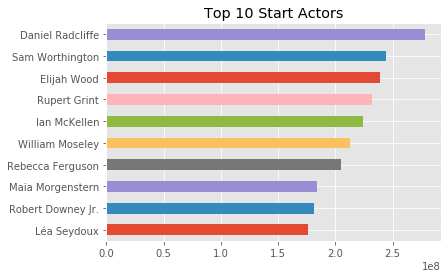

In [26]:
# Top 10 start actors
color=[x['color'] for x in list(plt.rcParams['axes.prop_cycle'])]
movies_by_stars.revenue.sort_values().tail(10).plot(kind='barh',title='Top 10 Start Actors',color=color)

2.8 The relation between revenue and release date

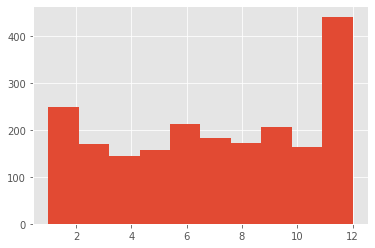

In [27]:
movies0015['month']=pd.to_datetime(movies_credits['release_date']).apply(lambda x:x.month)
movies0015['day']=pd.to_datetime(movies_credits['release_date']).apply(lambda x:x.day)
movies0015.month.hist()

1. Most movies are released in december and january.
2. April and May has less movies than others which may be a good time to release new movies.

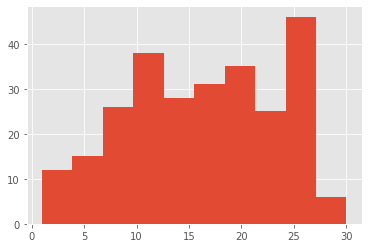

In [28]:
# Each day od December
movies0015[movies0015.month==12].day.hist()

1. Most of movies are shown at two weeks before Christmas and that day.

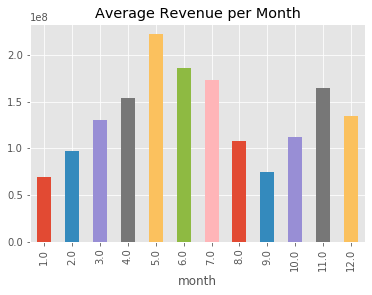

In [29]:
# Revenue and date
rvn_month=movies0015.groupby('month').revenue.sum()/movies0015.groupby('month').size()
color=[x['color'] for x in list(plt.rcParams['axes.prop_cycle'])]
rvn_month.plot(kind='bar',title='Average Revenue per Month',color=color)

## 3. Revenue Prediction

3.1 Select feature sets

In [30]:
# Create discrete feature sets
def discrete(kw1,kw2):
    binary=[]
    for kw in kw1.index:
        if kw in kw2:
            binary.append(1)
        else:
            binary.append(0)
    return binary

movies0015['genres_bin']=[discrete(genres,x) for x in movies0015.genres]
directors=movies0015.groupby('director').size().sort_values(ascending=False)
movies0015['director_bin']=[discrete(directors,x) for x in movies0015.director]
stars=pd.Series(countF(movies0015.stars)).sort_values(ascending=False)
movies0015['stars_bin']=[discrete(stars,x) for x in movies0015.stars]   

selected_data=movies0015[['genres_bin','director_bin','stars_bin','budget','revenue']]

# selected_data=movies0015[['genres','director','stars','revenue']]

In [31]:
# split data for train and test
#movies0015.info()
selected_data.info()
X_train, X_test, y_train, y_test = train_test_split(selected_data.iloc[:,:4], selected_data.iloc[:,4], test_size=0.2,random_state=0)
y_train=y_train.to_frame()
y_test=y_test.to_frame()
print("X_train: ",type(X_train),X_train.shape)
print("y_train: ",type(y_train),y_train.shape)
print("X_test: ",type(X_test),X_test.shape)
print("y_test: ",type(y_train),y_test.shape)

# print(X_train)
X_train.info()
y_train.info()
# X_train.head(1)
# y_train.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 5 columns):
genres_bin      2095 non-null object
director_bin    2095 non-null object
stars_bin       2095 non-null object
budget          2095 non-null int64
revenue         2095 non-null int64
dtypes: int64(2), object(3)
memory usage: 82.0+ KB
X_train:  <class 'pandas.core.frame.DataFrame'> (1676, 4)
y_train:  <class 'pandas.core.frame.DataFrame'> (1676, 1)
X_test:  <class 'pandas.core.frame.DataFrame'> (419, 4)
y_test:  <class 'pandas.core.frame.DataFrame'> (419, 1)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 311 to 1653
Data columns (total 4 columns):
genres_bin      1676 non-null object
director_bin    1676 non-null object
stars_bin       1676 non-null object
budget          1676 non-null int64
dtypes: int64(1), object(3)
memory usage: 65.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 311 to 1653
Data columns (total 1 columns):
revenue    1676 no

Accuracy of train = 0.993
Accuracy of test = 0.055
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.243169 to fit



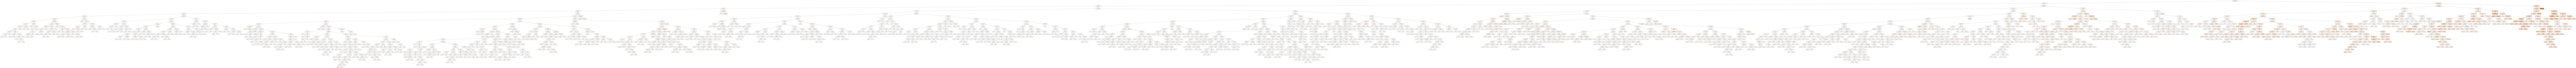

In [32]:
# predict
def accuracy(prediction,truth):
    correct=0
    # print(type(prediction),prediction)
    # print(type(truth),truth)
    prediction=prediction.tolist()
    truth=truth['revenue'].values.tolist()
    for p,t in zip(prediction,truth):
        # print(type(p))
        # print(type(t))
        if p>=0.9*t and p<=1.1*t:
            correct+=1
    return correct/len(truth)

# Dont use regression tree because sklearn does not support features with 
# categorical attributes form.
def onehot2index(onehot):
    # print(onehot)
    index=onehot.index(1)
    return index

X_train[['genres_bin','director_bin','stars_bin']]=X_train[['genres_bin','director_bin','stars_bin']].applymap(onehot2index)
X_test[['genres_bin','director_bin','stars_bin']]=X_test[['genres_bin','director_bin','stars_bin']].applymap(onehot2index)
# X_train2.applymap(onehot2index)  
reg_tree=tree.DecisionTreeRegressor()
reg_tree=reg_tree.fit(X_train,y_train)
acc_train=accuracy(reg_tree.predict(X_train),y_train)
acc_test=accuracy(reg_tree.predict(X_test),y_test)
print("Accuracy of train = {:.3f}".format(acc_train))
print("Accuracy of test = {:.3f}".format(acc_test))

dot_data=tree.export_graphviz(reg_tree,out_file=None,  
                     filled=True, rounded=True,  
                     special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

We can see from the result that the model got high accuracy on train data set and very low accuracy in test
data sets. This problem may be caused by categorical attribute which can not be correctly splited like numeric feature.

We need pruning to avoid overfiting problem.

Accuracy of train = 0.098
Accuracy of test = 0.093


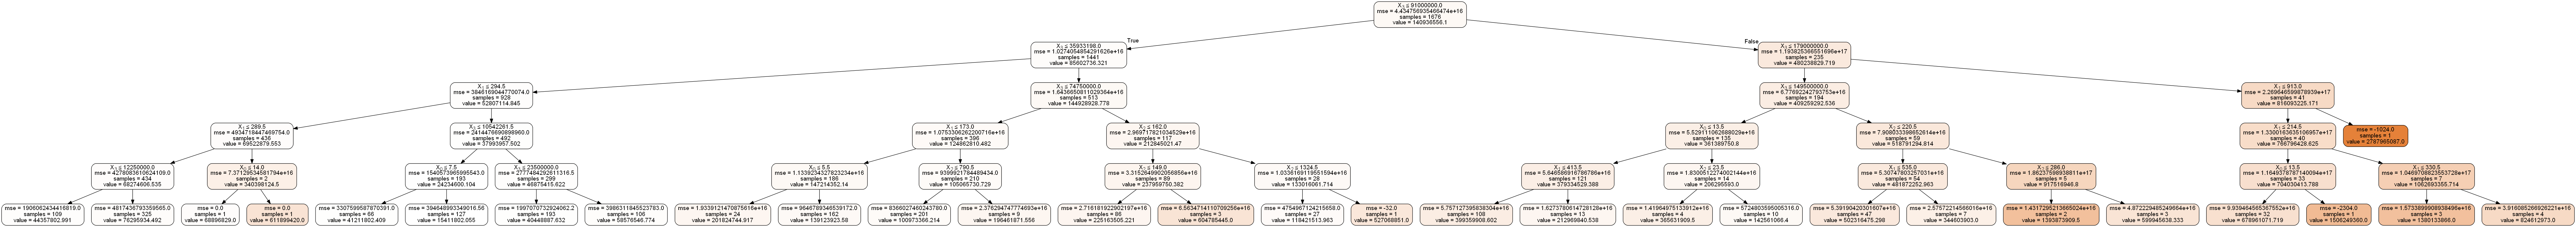

In [33]:
#limit max_depth to do pruning
reg_tree=tree.DecisionTreeRegressor(max_depth=5)
reg_tree=reg_tree.fit(X_train,y_train)
acc_train=accuracy(reg_tree.predict(X_train),y_train)
acc_test=accuracy(reg_tree.predict(X_test),y_test)
print("Accuracy of train = {:.3f}".format(acc_train))
print("Accuracy of test = {:.3f}".format(acc_test))

dot_data=tree.export_graphviz(reg_tree,out_file=None,  
                     filled=True, rounded=True,  
                     special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Try to use MLP

In [34]:
# MLP
mlp=MLPRegressor(max_iter=1000)
mlp.fit(X_train,y_train)
acc_train=accuracy(mlp.predict(X_train),y_train)
acc_test=accuracy(mlp.predict(X_test),y_test)
print("Accuracy of train = {:.3f}".format(acc_train))
print("Accuracy of test = {:.3f}".format(acc_test))

C:\Users\God1W\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of train = 0.080
Accuracy of test = 0.093


Instead of use regression tree, we try to use a kind a method
which is based on similiarity.

1. Use five most similiarity movies to predict
2. Get average return rate(revenue/budget).
3. Use budget and average return rate to predict.

In [35]:
def distance(movie1,movie2):
    dis=0
    lst=[[movie1.genres_bin,movie2.genres_bin],
        [movie1.director_bin,movie2.director_bin],
        [movie1.stars_bin,movie2.stars_bin]
    ]
    for f1,f2 in lst:
        if (i not in f1) or (1 not in f2):
            d=1
        else:
            d=spatial.distance.cosine(f1,f2)
        dis+=d
    return dis

def predictor(new_movie):
    mv=pd.Series()
    mv['genres_bin']=new_movie['genres_bin']
    mv['director_bin']=new_movie['director_bin']
    mv['stars_bin']=new_movie['stars_bin']
    mv['budget']=new_movie['budget']
    p=selected_data.copy()
    p['distance']=[distance(p.iloc[i],mv) for i in range(len(p))]
    p=p.sort_values('distance')
    p_avg=np.mean(p.revenue[0:5]/p.budget[0:5])*new_movie['budget']
    return p_avg

def accuracy2(movies,truth):
    n=len(movies)
    correct=0
    for index,row in movies.iterrows():
        m={'genres_bin':row['genres_bin'],
            'director_bin':row['director_bin'],
            'stars_bin':row['stars_bin'],
            'budget':row['budget']
            }
        # print(m)
        p=predictor(m)
        if p>=0.1*truth[index] and p<=10*truth[index]:
            correct+=1
        # print(p," / ",truth[index]," = ",p/truth[index])
    return correct/n

total_train=0
total_test=0
k=1 # have test k=3, the result has been recorded in report
for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(selected_data.iloc[:,:4], selected_data.iloc[:,4], test_size=0.2,random_state=1)

    acc2_train=accuracy2(X_train,y_train)
    # print(acc2_train)
    acc2_test=accuracy2(X_test,y_test)
    print("Iteration: ",i)
    total_train+=acc2_train
    total_test+=acc2_test
    print("Accuracy of train = {:.3f}".format(acc2_train))
    print("Accuracy of test = {:.3f}".format(acc2_test))
            
print("Average accuracy of train = {:.3f}".format(total_train/k))
print("Average accuracy of test = {:.3f}".format(total_test/k))

Iteration:  0
Accuracy of train = 0.943
Accuracy of test = 0.943
Average accuracy of train = 0.943
Average accuracy of test = 0.943
